In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('data.csv')

C:\ANACONDA\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data.head()

,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,NaN,NaN,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,NaN,NaN,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,NaN,NaN,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,NaN,NaN,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,NaN,NaN,127,cases


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107619 entries, 0 to 107618
Data columns (total 9 columns):
report_date         107612 non-null object
location            107612 non-null object
location_type       107612 non-null object
data_field          107612 non-null object
data_field_code     107612 non-null object
time_period         0 non-null float64
time_period_type    0 non-null float64
value               107481 non-null object
unit                107612 non-null object
dtypes: float64(2), object(7)
memory usage: 7.4+ MB


In [7]:
data.describe()

,time_period,time_period_type
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [8]:
data.drop(['time_period', 'time_period_type'], inplace = True, axis = 1)
data.head()

,report_date,location,location_type,data_field,data_field_code,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,127,cases


In [9]:
len(data)

107619

In [10]:
data = data[data['value'] != '125*5']
data = data[data['value'] != '149*5']
data = data[data['value'] != '5*']
data['value_new'] = [float(i) for i in data['value']]
type(data['value_new'][0])

numpy.float64

In [11]:
data.head()

,report_date,location,location_type,data_field,data_field_code,value,unit,value_new
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0,cases,0.0
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,0,cases,0.0
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,2,cases,2.0
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,1,cases,1.0
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,127,cases,127.0


In [12]:
cat1 = data[data['location'] == 'Argentina-Buenos_Aires']
cat1 = cat1.groupby('data_field').aggregate('sum')
cat1.columns = ['cat1']
cat1

,cat1
data_field,
cumulative_cases_discarded,251.0
cumulative_cases_under_study,2981.0
cumulative_confirmed_imported_cases,32.0
cumulative_confirmed_local_cases,0.0
cumulative_probable_imported_cases,15.0
cumulative_probable_local_cases,0.0


In [13]:
cat2 = data[data['location'] == 'Argentina-CABA']
cat2 = cat2.groupby('data_field').aggregate('sum')
cat2.columns = ['cat2']
cat2

,cat2
data_field,
cumulative_cases_discarded,27.0
cumulative_cases_under_study,1748.0
cumulative_confirmed_imported_cases,124.0
cumulative_confirmed_local_cases,0.0
cumulative_probable_imported_cases,0.0
cumulative_probable_local_cases,0.0


In [14]:
cat3 = data[data['location'] == 'Argentina-Catamarca']
cat3 = cat3.groupby('data_field').aggregate('sum')
cat3.columns = ['cat3']
cat3

,cat3
data_field,
cumulative_cases_discarded,0.0
cumulative_cases_under_study,212.0
cumulative_confirmed_imported_cases,0.0
cumulative_confirmed_local_cases,0.0
cumulative_probable_imported_cases,0.0
cumulative_probable_local_cases,0.0


In [15]:
table = cat1
table

,cat1
data_field,
cumulative_cases_discarded,251.0
cumulative_cases_under_study,2981.0
cumulative_confirmed_imported_cases,32.0
cumulative_confirmed_local_cases,0.0
cumulative_probable_imported_cases,15.0
cumulative_probable_local_cases,0.0


In [16]:
table['cat2'] = cat2['cat2']
table['cat3'] = cat3['cat3']
table

,cat1,cat2,cat3
data_field,,,
cumulative_cases_discarded,251.0,27.0,0.0
cumulative_cases_under_study,2981.0,1748.0,212.0
cumulative_confirmed_imported_cases,32.0,124.0,0.0
cumulative_confirmed_local_cases,0.0,0.0,0.0
cumulative_probable_imported_cases,15.0,0.0,0.0
cumulative_probable_local_cases,0.0,0.0,0.0


In [17]:
y = table.index.values
y

array(['cumulative_cases_discarded', 'cumulative_cases_under_study',
       'cumulative_confirmed_imported_cases',
       'cumulative_confirmed_local_cases',
       'cumulative_probable_imported_cases',
       'cumulative_probable_local_cases'], dtype=object)

In [18]:
x1 = np.array(table['cat1'])
x2 = np.array(table['cat2'])
x3 = np.array(table['cat3'])
x1, x2, x3

(array([ 251., 2981.,   32.,    0.,   15.,    0.]),
 array([  27., 1748.,  124.,    0.,    0.,    0.]),
 array([  0., 212.,   0.,   0.,   0.,   0.]))

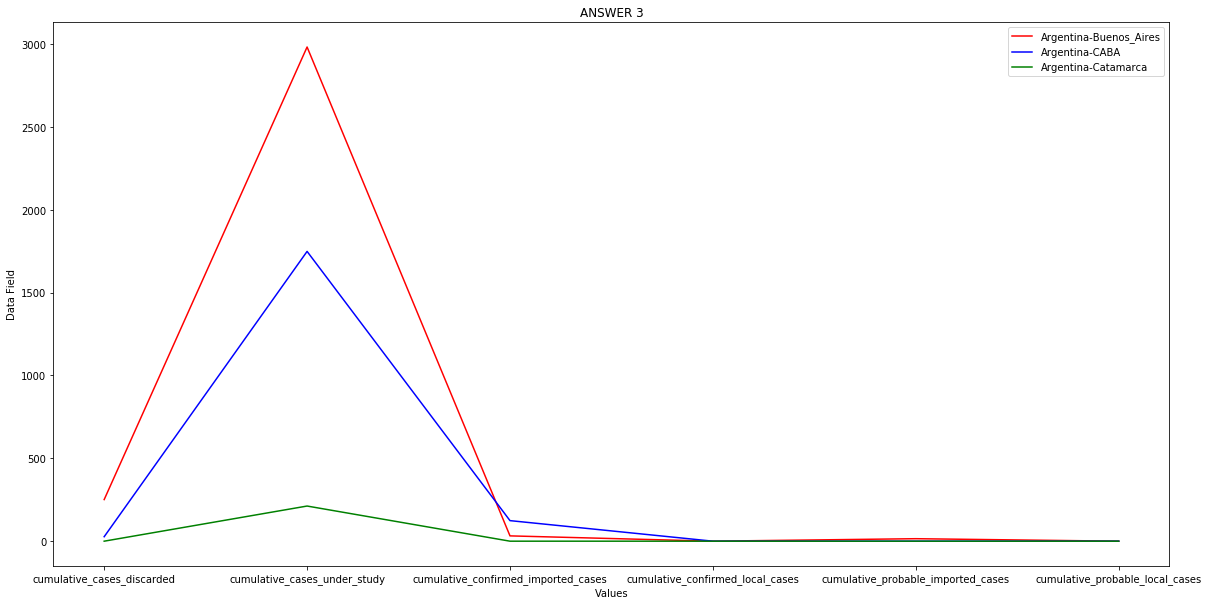

In [21]:
plt.figure(figsize=(20,10))
plt.plot(y,x1, color='red', label = 'Argentina-Buenos_Aires')
plt.plot(y,x2, color='blue', label='Argentina-CABA')
plt.plot(y,x3, color='green', label='Argentina-Catamarca')
plt.xlabel("Values")
plt.ylabel("Data Field")
plt.title("ANSWER 3")
plt.legend()
plt.show()